# Part 1: Data Preprocessing
We will first attempt to preprocess the data for the project. This is an important step to make sure that our data is clean before feeding it into our machine learning model.

(918, 12)
   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0  
     Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
913   45   M            TA        110          264          0     Normal   
914   68   M           ASY        144        

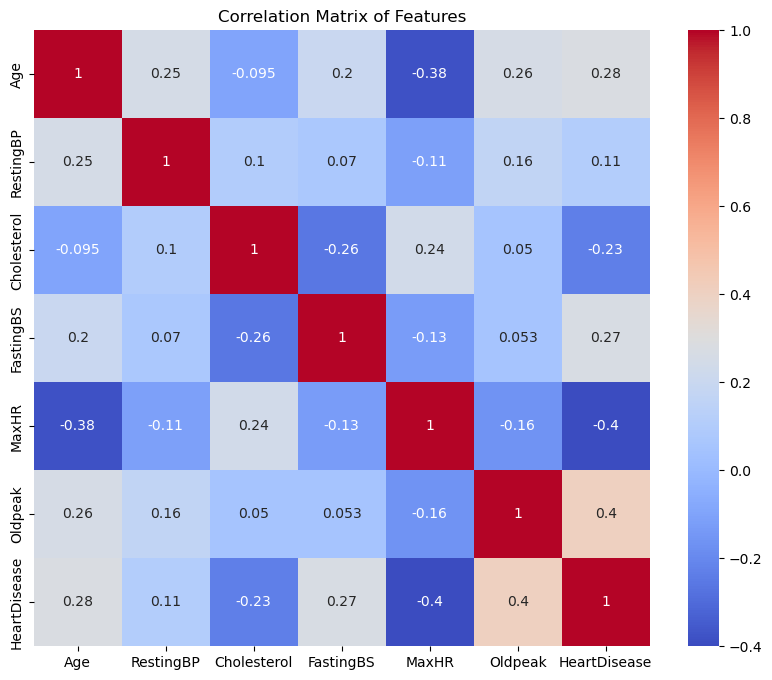

In [579]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sci
import seaborn as sns

data_file_path = "heart.csv"
dataset = pd.read_csv(data_file_path)

# explore data using the following functions:
print(dataset.shape)
print(dataset.head())
print(dataset.tail())
print(dataset.info())

# correlation analysis
numerical_data = dataset.select_dtypes(include='number')
corr_mtx = numerical_data.corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr_mtx, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix of Features')
plt.show()


In [580]:
# null value checks

print(dataset.isnull().sum())
# no null values! :) So there is no need for this step.

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


              Age   RestingBP  Cholesterol   FastingBS       MaxHR  \
count  918.000000  918.000000   918.000000  918.000000  918.000000   
mean    53.510893  132.396514   198.799564    0.233115  136.809368   
std      9.432617   18.514154   109.384145    0.423046   25.460334   
min     28.000000    0.000000     0.000000    0.000000   60.000000   
25%     47.000000  120.000000   173.250000    0.000000  120.000000   
50%     54.000000  130.000000   223.000000    0.000000  138.000000   
75%     60.000000  140.000000   267.000000    0.000000  156.000000   
max     77.000000  200.000000   603.000000    1.000000  202.000000   

          Oldpeak  HeartDisease  
count  918.000000    918.000000  
mean     0.887364      0.553377  
std      1.066570      0.497414  
min     -2.600000      0.000000  
25%      0.000000      0.000000  
50%      0.600000      1.000000  
75%      1.500000      1.000000  
max      6.200000      1.000000  


<Figure size 500x500 with 0 Axes>

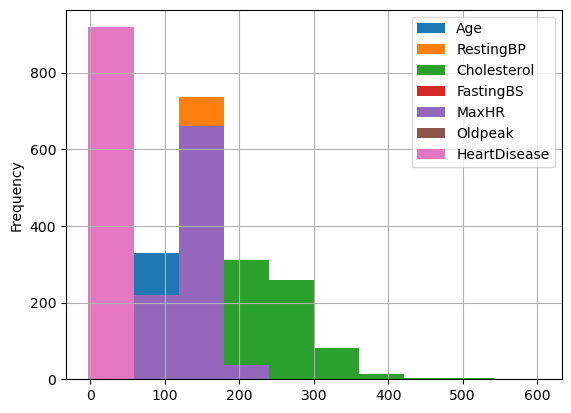

<Figure size 1000x500 with 0 Axes>

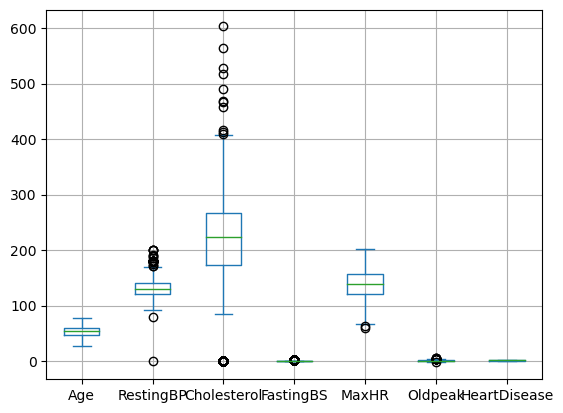

In [581]:
# summarize numerical features with describe
# investigate spread of numerical features with histograms and box plots.

print(dataset.describe())

plt.figure(figsize=(5,5))
numeric_features = dataset.select_dtypes("number").columns
dataset[numeric_features].plot.hist()
plt.grid(True)
plt.show()

plt.figure(figsize=(10,5))
dataset[numeric_features].plot.box()
plt.grid(True)
plt.show()

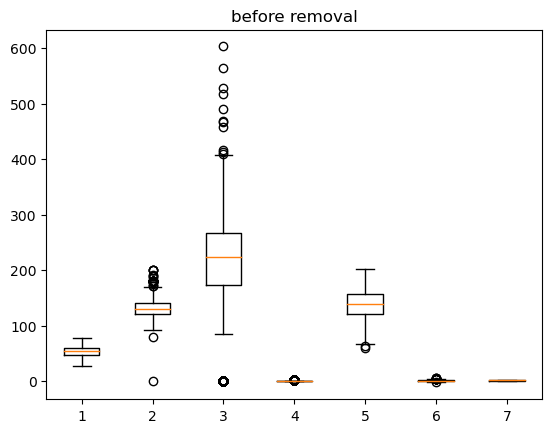

              Age   RestingBP  Cholesterol   FastingBS      MaxHR     Oldpeak  \
count  784.000000  784.000000   784.000000  784.000000  784.00000  784.000000   
mean    53.408163  130.931122   199.377551    0.220663  137.46301    0.813265   
std      8.614890   14.711716   103.176016    0.414959   23.63421    0.913278   
min     35.000000   96.000000     0.000000    0.000000   86.00000   -1.100000   
25%     47.000000  120.000000   177.000000    0.000000  120.00000    0.000000   
50%     54.000000  130.000000   223.000000    0.000000  138.00000    0.500000   
75%     60.000000  140.000000   266.000000    0.000000  156.00000    1.500000   
max     72.000000  165.000000   417.000000    1.000000  186.00000    3.000000   

       HeartDisease  
count    784.000000  
mean       0.530612  
std        0.499381  
min        0.000000  
25%        0.000000  
50%        1.000000  
75%        1.000000  
max        1.000000  
   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  

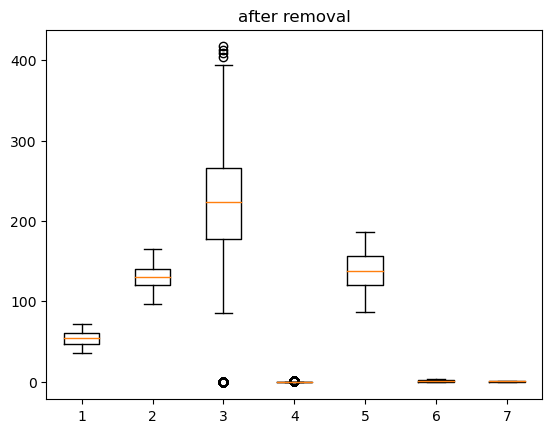

In [582]:
# outlier removal!
from scipy import stats

# get numerical dataframe:
numerical_data = dataset.select_dtypes(include='number')
plt.boxplot(numerical_data)
plt.title("before removal")
plt.show()

z_scores = numerical_data.apply(stats.zscore)
threshold = 2

outliers = z_scores.abs() > threshold
dataset_filtered = dataset[~outliers.any(axis=1)].copy()
 
print(dataset_filtered.describe())
print(dataset_filtered.head())
print(dataset_filtered.isna().sum())
print(dataset_filtered.shape)

numerical_data = dataset_filtered.select_dtypes('number')
plt.boxplot(numerical_data)
plt.title("after removal")
plt.show()

In [583]:
from sklearn.impute import SimpleImputer

features_to_impute = ['RestingBP', 'Cholesterol'] 

imputer = SimpleImputer(strategy='most_frequent', missing_values=0)

# zero for these columns indicate a missing value, so let's do imputation to fill them in.
features_imputed = pd.DataFrame(imputer.fit_transform(dataset_filtered[features_to_impute]),
                                columns=features_to_impute,
                                index=dataset_filtered.index)

dataset_imputed = dataset_filtered.replace(features_imputed)
    
print(dataset_imputed.describe())
print(dataset_imputed.head())
print(dataset_imputed.info())

              Age   RestingBP  Cholesterol   FastingBS      MaxHR     Oldpeak  \
count  784.000000  784.000000   784.000000  784.000000  784.00000  784.000000   
mean    53.408163  136.165816   256.567602    0.220663  137.46301    0.813265   
std      8.614890   13.442106    48.593242    0.414959   23.63421    0.913278   
min     35.000000  108.000000   123.000000    0.000000   86.00000   -1.100000   
25%     47.000000  130.000000   222.000000    0.000000  120.00000    0.000000   
50%     54.000000  135.000000   256.000000    0.000000  138.00000    0.500000   
75%     60.000000  145.000000   289.000000    0.000000  156.00000    1.500000   
max     72.000000  160.000000   404.000000    1.000000  186.00000    3.000000   

       HeartDisease  
count    784.000000  
mean       0.530612  
std        0.499381  
min        0.000000  
25%        0.000000  
50%        1.000000  
75%        1.000000  
max        1.000000  
   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  

In [584]:
# data normalization: minmax scaling
from sklearn.preprocessing import MinMaxScaler

numeric_columns = dataset_imputed.select_dtypes('number').columns
numeric_df = dataset_imputed[numeric_columns].values

minmax_scaler = MinMaxScaler()
minmax_scaler.fit(numeric_df)

numeric_df_scaled = minmax_scaler.transform(numeric_df)


dataset_scaled = dataset_imputed.copy()
dataset_scaled[numeric_columns] = numeric_df_scaled

# minmax scaler sometimes introduces nans to the dataset for things that do not apply:
print(dataset_scaled.isna().sum())
# dataset_scaled = dataset_scaled.dropna(axis=0)

print(dataset_scaled.describe())
print(dataset_scaled.info())
print(dataset_scaled.head())

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64
              Age   RestingBP  Cholesterol   FastingBS       MaxHR  \
count  784.000000  784.000000   784.000000  784.000000  784.000000   
mean     0.497518    0.541650     0.475330    0.220663    0.514630   
std      0.232835    0.258502     0.172930    0.414959    0.236342   
min      0.000000    0.000000     0.000000    0.000000    0.000000   
25%      0.324324    0.423077     0.352313    0.000000    0.340000   
50%      0.513514    0.519231     0.473310    0.000000    0.520000   
75%      0.675676    0.711538     0.590747    0.000000    0.700000   
max      1.000000    1.000000     1.000000    1.000000    1.000000   

          Oldpeak  HeartDisease  
count  784.000000    784.000000  
mean     0.466650      0.530612  
std      0.222

In [585]:
# now we process non-numerical data:
# let's just try onehot - assume no hierarchy.

encoded_data = pd.get_dummies(dataset_scaled, columns=dataset_scaled.select_dtypes('object').columns)

print(encoded_data.head())
print(encoded_data.describe())

        Age  RestingBP  Cholesterol  FastingBS  MaxHR   Oldpeak  HeartDisease  \
0  0.135135   1.000000     0.153025        0.0   0.86  0.268293           0.0   
1  0.378378   0.615385     0.362989        0.0   0.70  0.512195           1.0   
2  0.054054   0.711538     0.786477        0.0   0.12  0.268293           0.0   
3  0.351351   0.615385     0.366548        0.0   0.22  0.634146           1.0   
4  0.513514   0.423077     0.249110        0.0   0.36  0.268293           0.0   

   Sex_F  Sex_M  ChestPainType_ASY  ...  ChestPainType_NAP  ChestPainType_TA  \
0  False   True              False  ...              False             False   
1   True  False              False  ...               True             False   
2  False   True              False  ...              False             False   
3   True  False               True  ...              False             False   
4  False   True              False  ...               True             False   

   RestingECG_LVH  RestingECG_No

In [586]:
# Save to CSV: this is a leftover from our previous assignment
encoded_data.to_csv("preprocessed_heart_data.csv")

# Part 2: Applying Data to Model

In [587]:
# split model into train, test, validate.
from sklearn.model_selection import train_test_split

target_var_name = 'HeartDisease'

y = encoded_data[target_var_name]
X = encoded_data.drop(target_var_name, axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=37)


In [588]:
# Declaration of useful methods for performance evaluation:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import LearningCurveDisplay

def show_confusion_mtx(cm):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, cmap="Blues", fmt=".1f")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()

def acc_prec_rec(y_test, y_pred, printfn):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    printfn("Performance Results (instance-level scores):")
    printfn(f"Accuracy: {accuracy:.3f}")
    printfn(f"Precision: {precision:.3f}")
    printfn(f"Recall: {recall:.3f}")
    printfn(f"F1: {f1:.3f}")

def plot_loss(model):
    sns.set_style("whitegrid")
    plt.plot(model.loss_)
    plt.title('Loss History')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.show()
    
def learning_curve(model, X_train, y_train):
    # create learning curve
    LearningCurveDisplay.from_estimator(model, X_train, y_train, scoring='f1_macro', cv=5, n_jobs=-1) 
    plt.title('Learning Curve')
    plt.show()


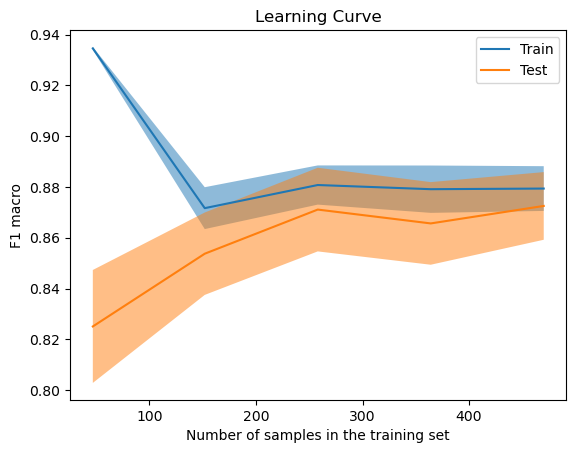

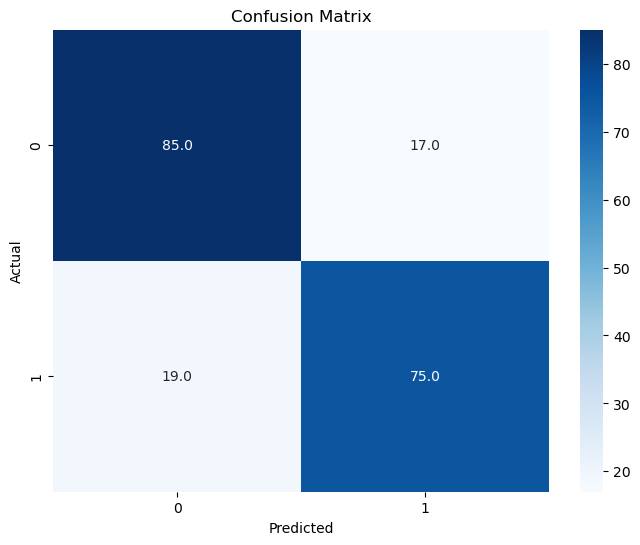

Performance Results (instance-level scores):
Accuracy: 0.816
Precision: 0.815
Recall: 0.798
F1: 0.806

Classification Report:
              precision    recall  f1-score   support

         0.0       0.82      0.83      0.83       102
         1.0       0.82      0.80      0.81        94

    accuracy                           0.82       196
   macro avg       0.82      0.82      0.82       196
weighted avg       0.82      0.82      0.82       196



In [589]:
# logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

# train model
logreg = LogisticRegression(max_iter=1000000)
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

# learning curve exploration
learning_curve(logreg, X_train, y_train) 

# evaluate performance so far...
cm = confusion_matrix(y_test, y_pred)
show_confusion_mtx(cm)

# acc, prec, recall.
acc_prec_rec(y_test, y_pred, print)
print()

# more detailed data
print("Classification Report:")
print(classification_report(y_test, y_pred))

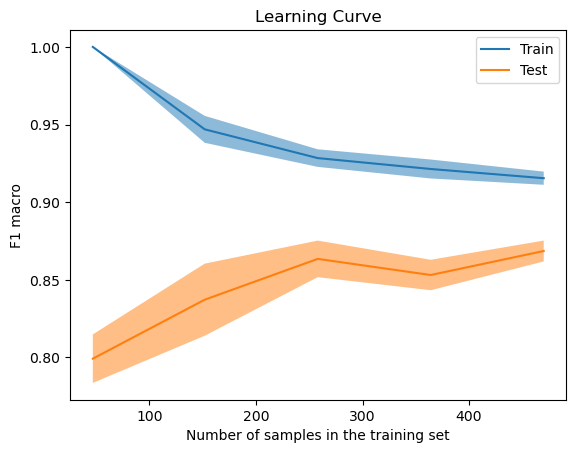

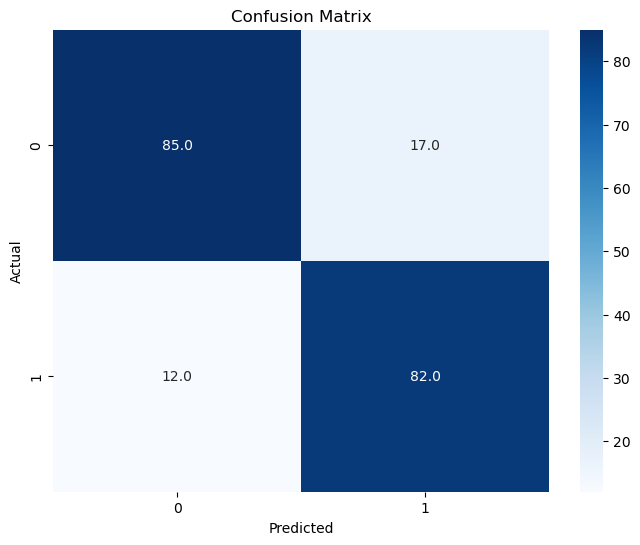

Performance Results (instance-level scores):
Accuracy: 0.852
Precision: 0.828
Recall: 0.872
F1: 0.850

Classification Report:
              precision    recall  f1-score   support

         0.0       0.88      0.83      0.85       102
         1.0       0.83      0.87      0.85        94

    accuracy                           0.85       196
   macro avg       0.85      0.85      0.85       196
weighted avg       0.85      0.85      0.85       196



In [590]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

# make RFC model
rfc = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=22)
rfc.fit(X_train, y_train)

# make prediction
y_pred = rfc.predict(X_test)

# learning curve exploration
learning_curve(rfc, X_train, y_train) 

# evaluate performance so far...
cm = confusion_matrix(y_test, y_pred)
show_confusion_mtx(cm)

# acc, prec, recall.
acc_prec_rec(y_test, y_pred, print)
print()

# more detailed data
print("Classification Report:")
print(classification_report(y_test, y_pred))

Best Parameters: {'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 4, 'n_estimators': 100}



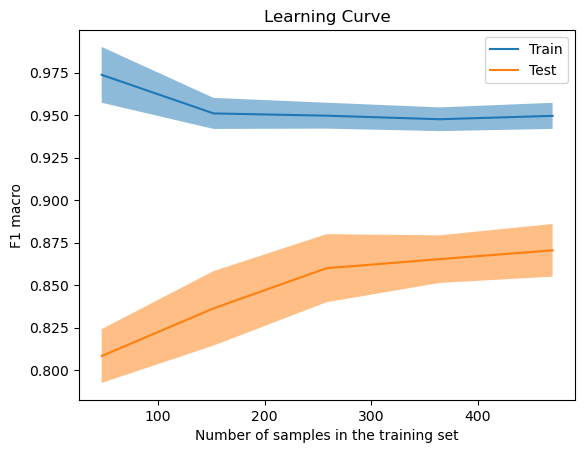

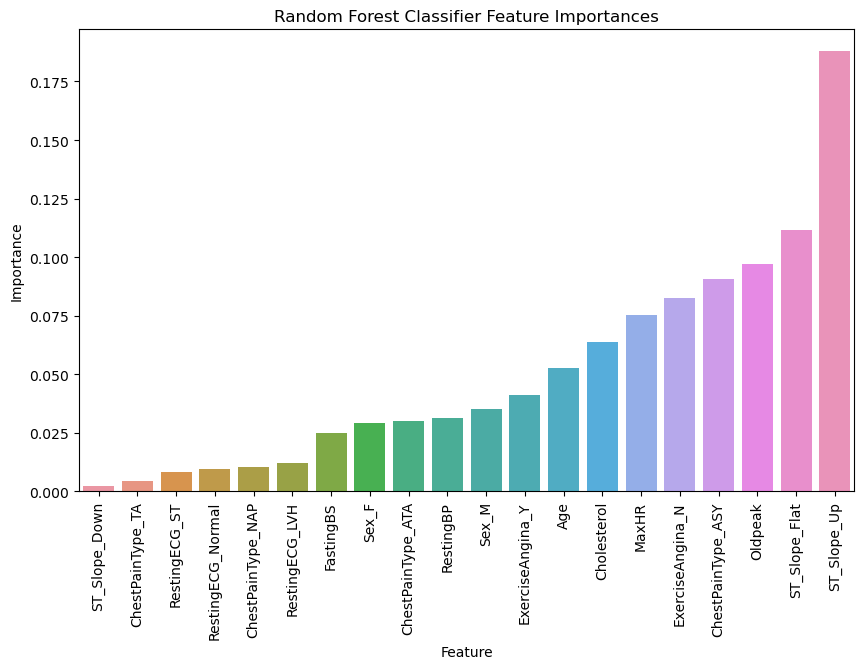

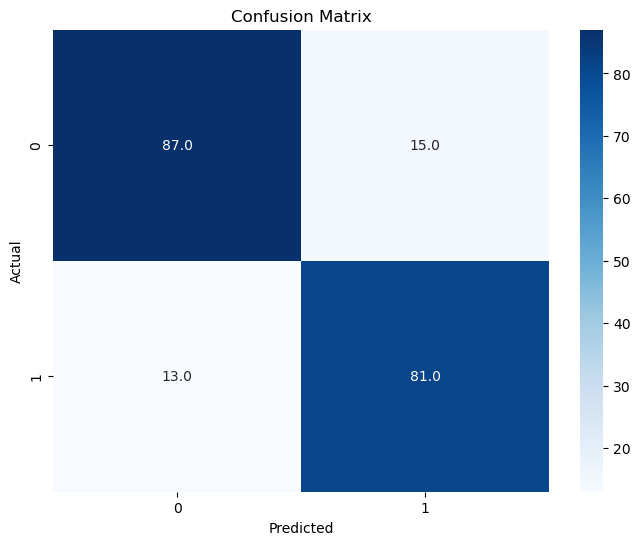

Performance Results (instance-level scores):
Accuracy: 0.857
Precision: 0.844
Recall: 0.862
F1: 0.853

Classification Report:
              precision    recall  f1-score   support

         0.0       0.87      0.85      0.86       102
         1.0       0.84      0.86      0.85        94

    accuracy                           0.86       196
   macro avg       0.86      0.86      0.86       196
weighted avg       0.86      0.86      0.86       196



In [599]:
# Random Forest Classifier w/ hyperparameter search
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None],
}

grid_search = GridSearchCV(RandomForestClassifier(), param_grid, scoring='f1_macro', cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print()

best_rfc = grid_search.best_estimator_

# make prediction
y_pred = best_rfc.predict(X_test)

# learning curve exploration
learning_curve(best_rfc, X_train, y_train) 

# feature importances
importance_values = best_rfc.feature_importances_
feature_names = X.columns

sorted_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importance_values}).sort_values(by='Importance')

plt.figure(figsize=(10,6))
plt.xticks(rotation=90)
sns.barplot(x="Feature", y="Importance", data=sorted_importances)
plt.title('Random Forest Classifier Feature Importances' )
plt.show()

# evaluate performance so far...
cm = confusion_matrix(y_test, y_pred)
show_confusion_mtx(cm)

# acc, prec, recall.
acc_prec_rec(y_test, y_pred, print)
print()

# more detailed data
print("Classification Report:")
print(classification_report(y_test, y_pred))

Best Parameters: {'activation': 'relu', 'hidden_layer_sizes': (20, 40), 'max_iter': 10000, 'solver': 'sgd'}



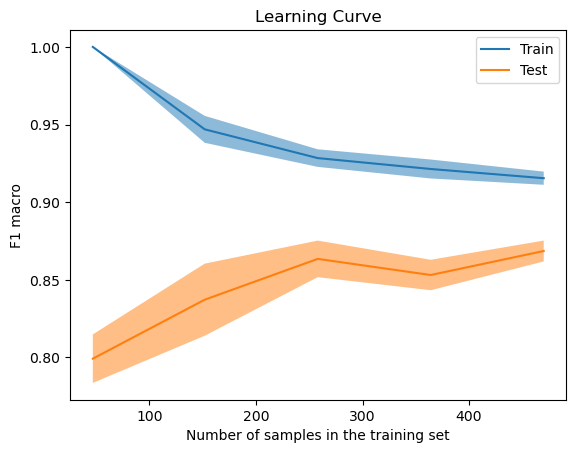

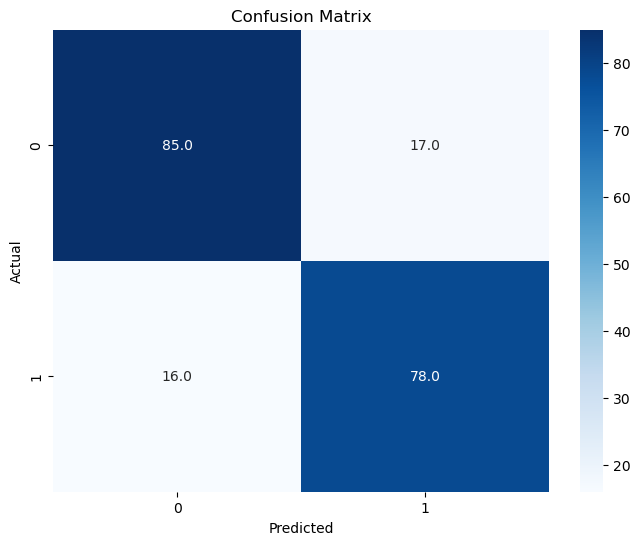

Performance Results (instance-level scores):
Accuracy: 0.832
Precision: 0.821
Recall: 0.830
F1: 0.825

Classification Report:
              precision    recall  f1-score   support

         0.0       0.84      0.83      0.84       102
         1.0       0.82      0.83      0.83        94

    accuracy                           0.83       196
   macro avg       0.83      0.83      0.83       196
weighted avg       0.83      0.83      0.83       196



In [593]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'hidden_layer_sizes': [(5, 10), (20, 40), (40, 20)],
    'activation': ['relu', 'logistic'],
    'solver': ['sgd', 'adam'],
    'max_iter': [10000]
}

grid_search = GridSearchCV(MLPClassifier(), param_grid, cv=5, scoring='f1_macro', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print()

clf = grid_search.best_estimator_
y_pred = clf.predict(X_test)

# learning curve exploration
learning_curve(rfc, X_train, y_train) 

# evaluate performance so far...
cm = confusion_matrix(y_test, y_pred)
show_confusion_mtx(cm)

# acc, prec, recall.
acc_prec_rec(y_test, y_pred, print)
print()

# more detailed data
print("Classification Report:")
print(classification_report(y_test, y_pred))